## Exercise 01 : 
----------

In [85]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


In [86]:
X, y = make_blobs(n_samples=501,n_features=2, centers=3, random_state=100)
print(X.shape, y.shape)

(501, 2) (501,)


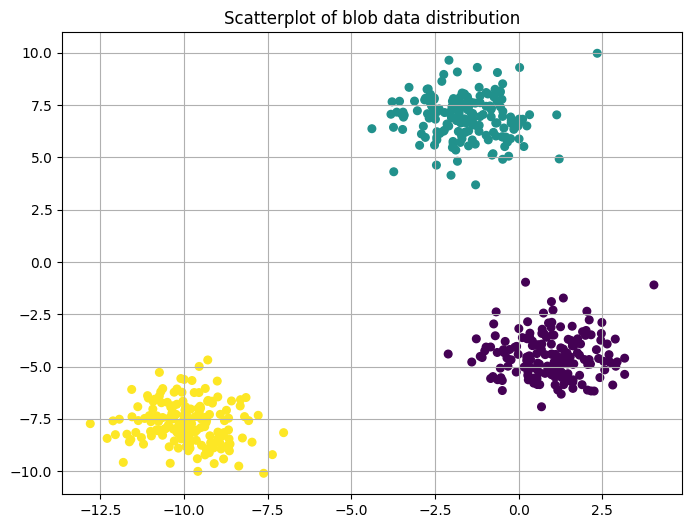

In [87]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.title('Scatterplot of blob data distribution')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
plt.show()

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# Step 1: Initialize cluster centers and plot them with data points
def initialize_clusters(k: int, X: np.ndarray) -> dict:
    clusters = {}
    np.random.seed(23)
    for i in range(k):
        center = 2*(2*np.random.random((X.shape[1],))-1)
        cluster = {'center': center, 'points': []}
        clusters[i] = cluster
    return clusters

In [90]:
# Step 2: Assign observations to clusters based on nearest center
def assign_clusters(X: np.ndarray, clusters: dict) -> dict:
    for i in range(X.shape[0]):
        dist = []
        curr_x = X[i]
        for j in range(len(clusters)):
            # using euclidean distance
            dis = np.sqrt(np.sum((curr_x - clusters[j]['center'])**2))
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

In [91]:
# Step 3: Update cluster centers to mean of their respective clusters
def update_clusters(clusters: dict) -> dict:
    for i in range(len(clusters)):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []
    return clusters

In [92]:
# Step 4: Repeat steps 2 and 3 until no observation changes cluster membership
def k_means(X: np.ndarray, k: int, max_iterations: int = 100) -> dict:
    clusters = initialize_clusters(k, X)
    for _ in range(max_iterations):
        prev_centers = [cluster['center'] for cluster in clusters.values()]
        clusters = assign_clusters(X, clusters)
        clusters = update_clusters(clusters)
        curr_centers = [cluster['center'] for cluster in clusters.values()]
        if np.allclose(prev_centers, curr_centers):
            break
    return clusters

In [93]:
# Step 5: Predict cluster for data points
def predict_cluster(X: np.ndarray, clusters: dict) -> np.ndarray:
    pred = []
    for i in range(X.shape[0]):
        dist = [np.sqrt(np.sum((X[i] - clusters[j]['center'])**2)) for j in range(len(clusters))]
        pred.append(np.argmin(dist))
    return np.array(pred)


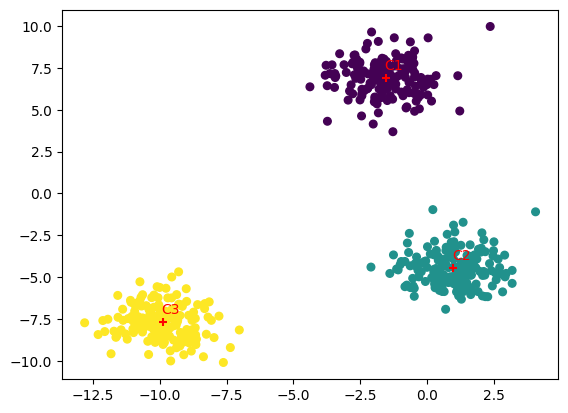

In [94]:
k = 3  
clusters = k_means(X, k)
pred = predict_cluster(X, clusters)
plt.scatter(X[:, 0], X[:, 1], c=pred, s=30, cmap='viridis')
for i,center in enumerate(clusters.values()):
    plt.scatter(center['center'][0], center['center'][1], marker='+', c='red')
    plt.annotate(f'C{i+1}', (center['center'][0], center['center'][1]), textcoords="offset points", xytext=(6,6), ha='center', c='red')
plt.show()

## Exercise 02 : 
---------

In [95]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [96]:
iris = load_iris()
X = iris.data


In [97]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [98]:
def find_optimal_k(X):
    inertias = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, 10), inertias, marker='o', c='lightcoral')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()


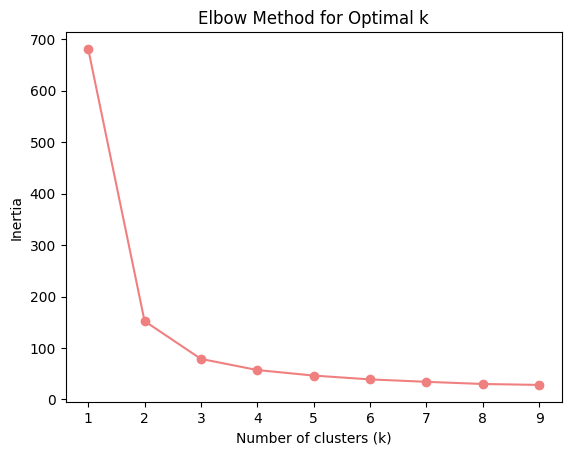

In [99]:
import warnings
warnings.filterwarnings("ignore")
find_optimal_k(X)

As we can see, the best value of K is **3**

In [100]:
def build_kmeans_model(X : np.ndarray, optimal_k: int =3):
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_
    print("Cluster centers:")
    print(cluster_centers)
    labels = kmeans.labels_
    
    return kmeans, cluster_centers, labels

In [101]:
kmeans_model, cluster_centers, labels = build_kmeans_model(X, optimal_k=3)

Cluster centers:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [102]:
kmeans_model.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [103]:
def predict_class(kmeans_model= None, new_observation: np.ndarray=None):
    predicted_class = kmeans_model.predict(new_observation)
    print("Predicted class for the new observation:", predicted_class)
    return predicted_class

In [104]:
obs = np.array([[0.8, 0.8, 0.8, 0.8]])
predicted_class = predict_class(kmeans_model, obs)

Predicted class for the new observation: [1]


In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [106]:
def plot_clusters(X, cluster_centers, labels, new_observation=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 2], c=labels, cmap='viridis', s=25, alpha=0.7)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 2], c='red', marker='x', s=50, label='Cluster Centers')
    # for i, center in enumerate(cluster_centers):
    #     plt.annotate(f'C{i+1}', (center[0], center[1]), textcoords="offset points", xytext=(5,5), ha='center',c='red')
    if new_observation is not None:
        plt.scatter(new_observation[:, 0], new_observation[:, 1], c='black', marker='+', s=50, label='New Observation')    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 3')
    plt.title('K-means Clustering')
    plt.legend()

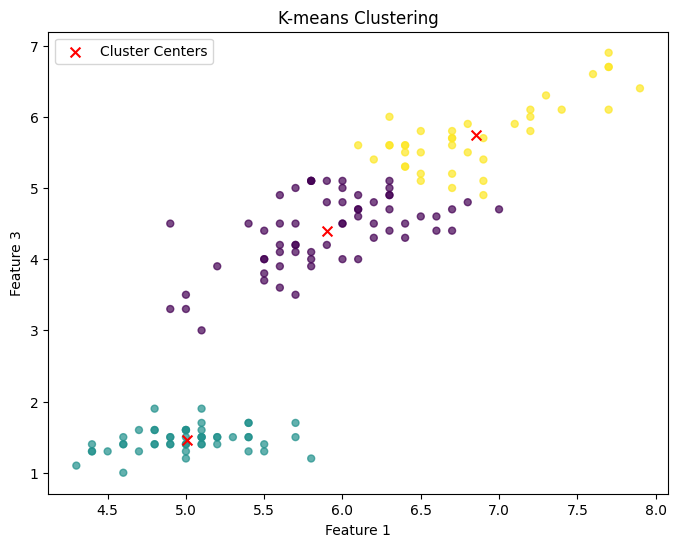

In [107]:
plot_clusters(X, cluster_centers, labels)